# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [128, 421, 343]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,140,8847,3823,142,1062,3
1,17063,4847,9053,1031,3415,1784
2,1689,6964,26316,1456,15469,37


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8
* Frozen: 3071.93

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
* Sample 1: By looking at the data and the mean statistics of the features, we get to know that the store in the first sample focuses on selling dairy products and grocery items more along with some quantity of detergent quantities, which means the main focus of the business is dairy and groceries, it means the establishment it represents a ***Dairy cum Grocery shop***.


* Sample 2: If you look at the data, in the second sample, the demand for Fresh category is quite high and resided at the higher end of the mean value, also it has some Delicatessen and Detergent Paper, from the data shown I can think of sample 2 as a ***food wagon***, which focuses, on  simple food to sustain it's business but has few delicacies, in it's menu. 


* Sample 3: From the data in the 3rd sample shown, I can think this sample as a shop keeper in a local grocery market, which keeps other items from different categories too, but his focus is on Groceries.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [223]:
#TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
for feature in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']:
    Y = data[feature]
    new_data = data.drop([feature], axis = 1, inplace = False)
    ## TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, Y, test_size = 0.25, random_state = 10)
    ## TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
    prediction = regressor.predict(X_test)
    ## TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "R-squared score for feature: {0} is: {1}".format(feature, score)

R-squared score for feature: Fresh is: -0.463299843174
R-squared score for feature: Milk is: 0.230929956286
R-squared score for feature: Grocery is: 0.729544365246
R-squared score for feature: Frozen is: 0.0960549454717
R-squared score for feature: Detergents_Paper is: 0.541087989968
R-squared score for feature: Delicatessen is: -10.5311275951


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* The feature I attempted to predict is **Detergent_Papers**. 
* The reported prediction score of **Detergent_Papers**, is ***0.542***.
* By looking at the ***R^2*** value of **Detergent_Papers**, it looks like there are some features in the data set, that are able to co-relate with **Detergent_Papers**, though I will not say that co-relation is high, because the R^2 value is fairly good and not too much high, since, ***R^2*** score, defines the ratio of the variance satisifed by the prediction made by the regression algorithm, I would say, it is neccessary to identify customers' spending habits, if the ***R^2*** score was higher around in range of 70-90, I would have ommitted this feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

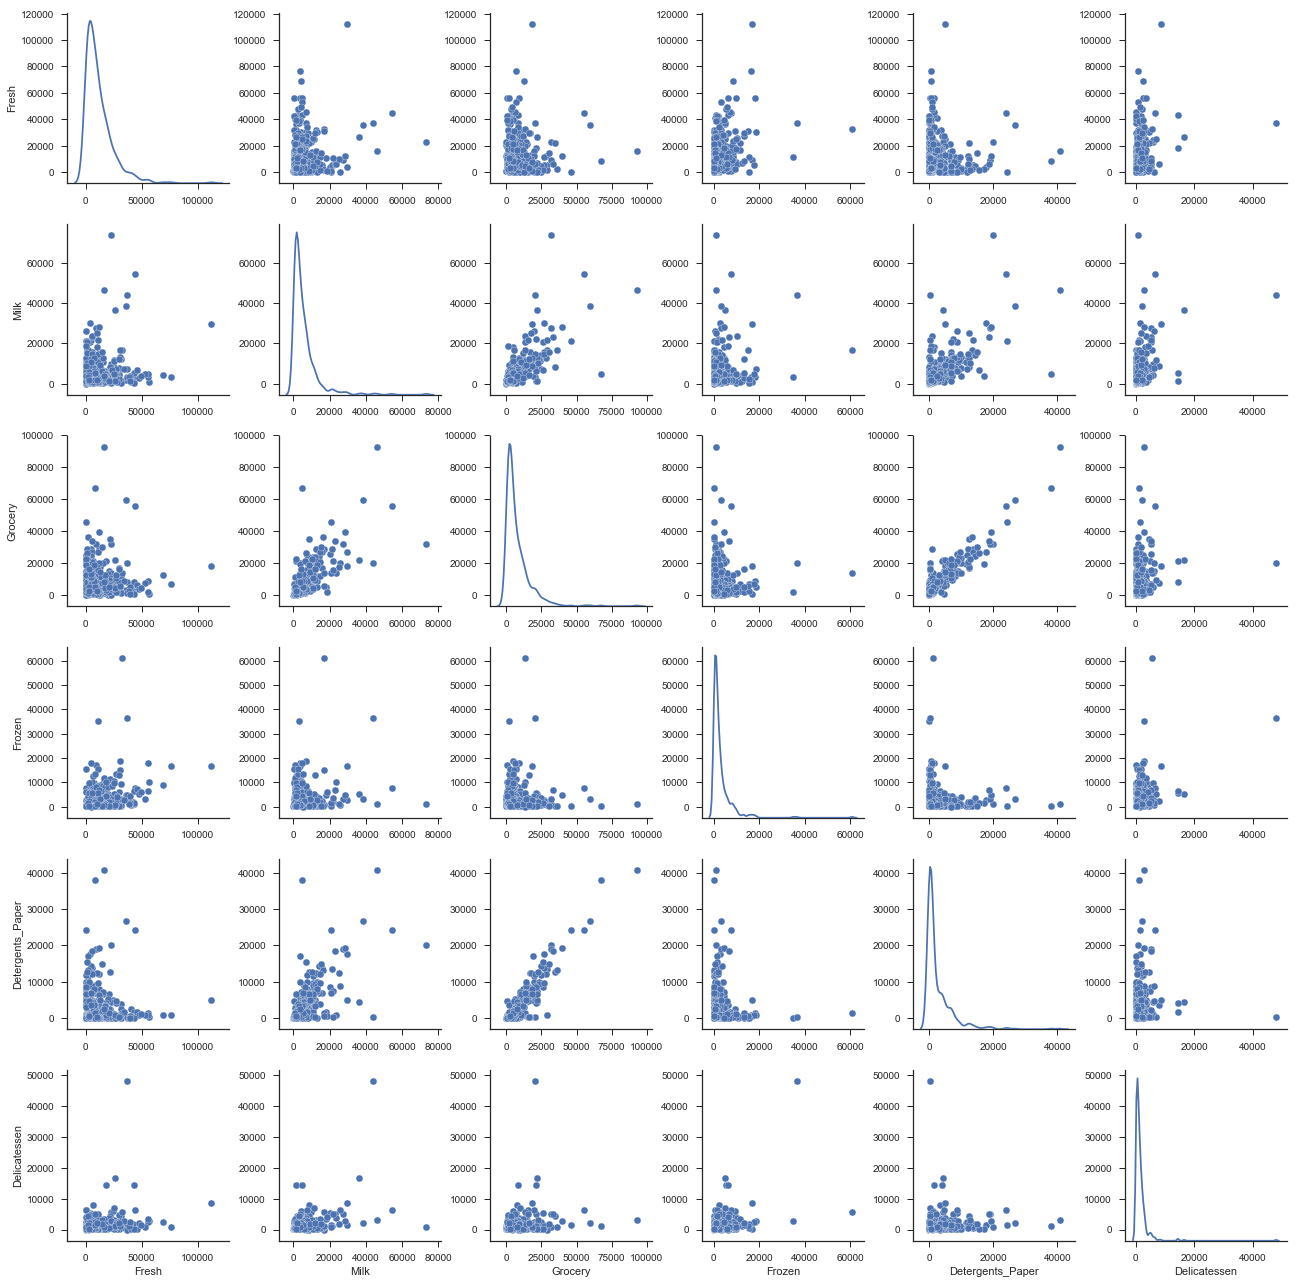

In [224]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=data, size=3, palette=sns.color_palette(), diag_kind="kde")

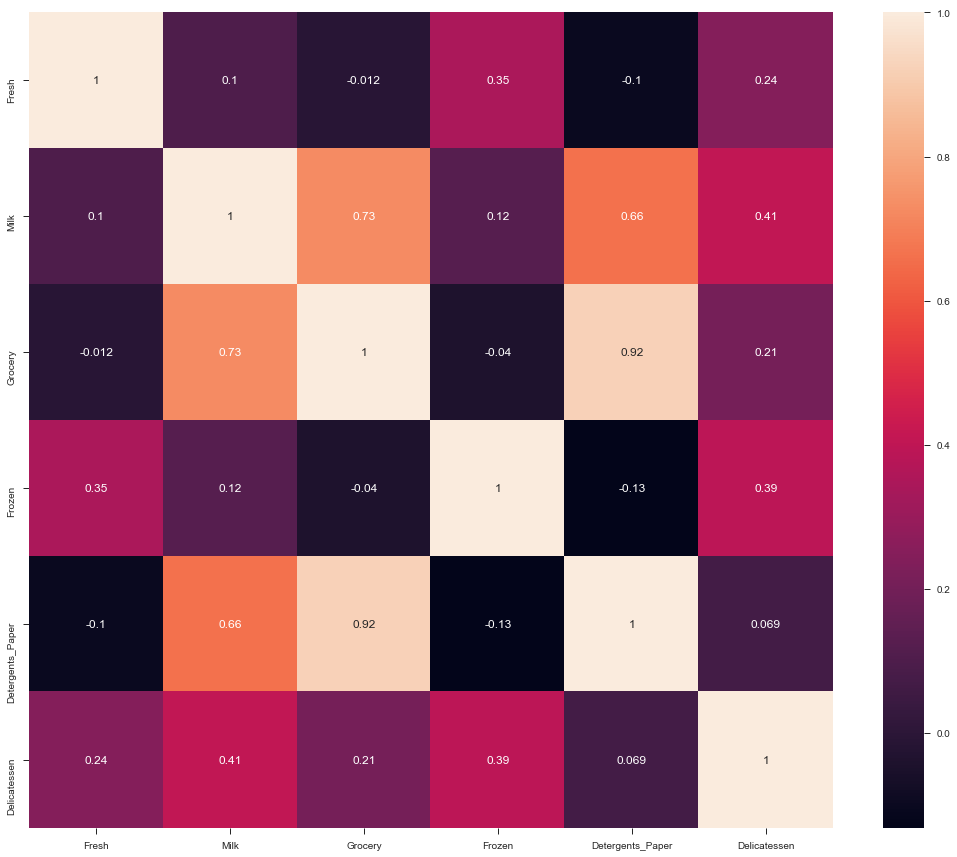

In [225]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(data.corr(), annot=True, ax=ax)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

- The scatter plot has been plotted, as well as the heatmap is also plotted.

- In my view, the heatmap, gives a better representation of the correlation of various features in the data set, because of the annotations shown with the color bar, it makes it very visually self explanatory to understand the correlation between features.

- Regarding the correlation of features.
    - **Detergent_Papers** and **Grocery** are very highly correlated with a score of **0.92**.
    - After the above features we see that, the **Grocery** and **Milk** are also highly correlated with a fairly high score of **0.73**.
    - If we see the above scores, it should also make sense intutively that **Detergent_Papers** and **Milk** should also correlated to some extent, which is true, when we look at the heatmap, and these two features have a score of **0.66**.
    - We can also count the correlation score of **Milk** and **Detergent_Papers** which is fairly good to say that these two are correlated to some extent, but highly correlated.
    
- The above heatmap/pair wise scatter plot, confirms my inference of low relevance of **Detergent_Papers** feature in the data set, since now, there are two features that correlate with **Detergent_Papers** we can remove this feature and as it now is less relevant for our predictions.

- The distribution of data in the features that are highly correlated is in the form of a straight line with positive slope(>= 1), as we can see the scatter plot of **Grocery** and **Milk**, the data points are clustering around a straight line, we can also see that the less the correlation score is, the less they are clustered in form of a line with +ve slope.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

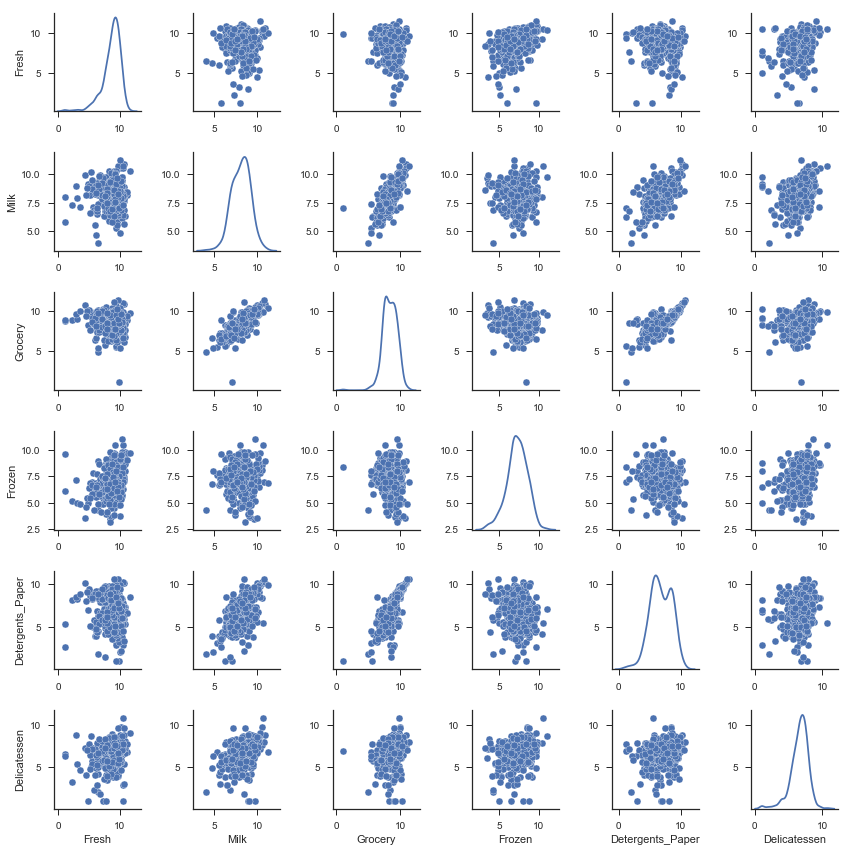

In [226]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.pairplot(data=log_data, size=2, palette=sns.color_palette(), diag_kind="kde")

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [227]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
1,9.744668,8.486115,9.110851,6.938284,8.135933,7.486613
2,7.431892,8.848509,10.177932,7.283448,9.646593,3.610918


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

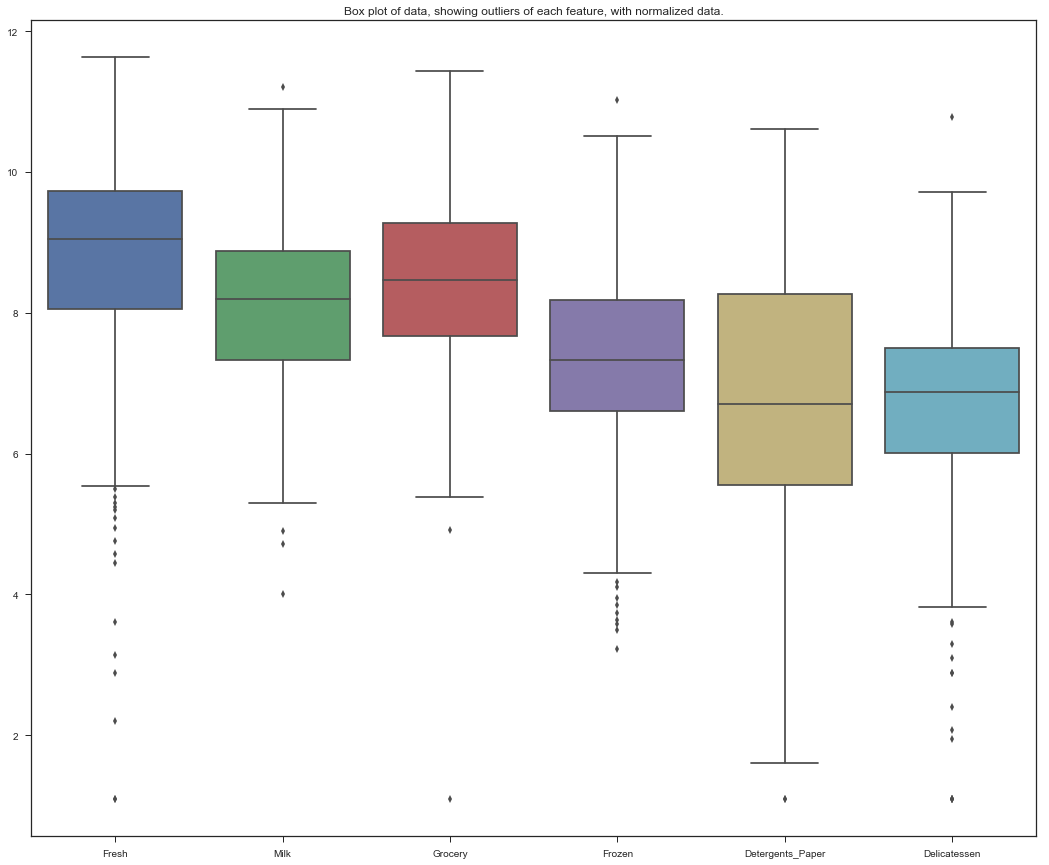

In [228]:
f, ax = plt.subplots(figsize=(18, 15))
plt.title("Box plot of data, showing outliers of each feature, with normalized data.")
sns.boxplot(data=log_data, ax=ax)

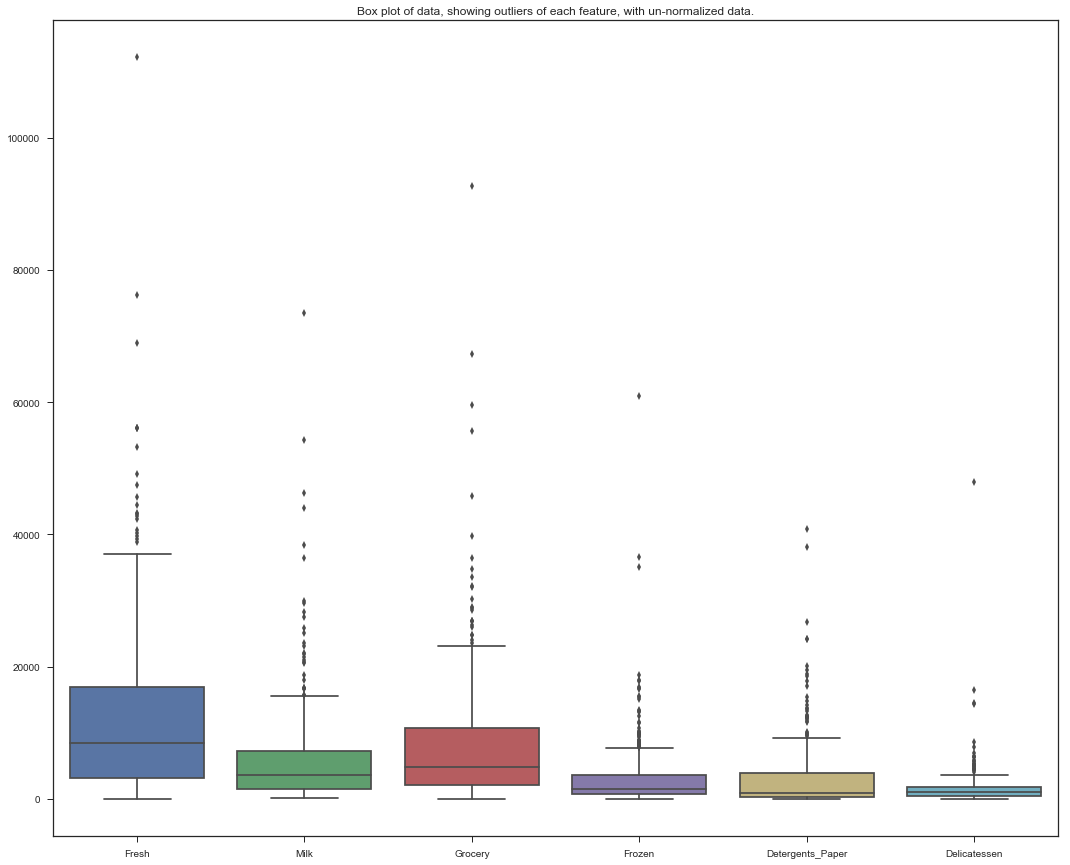

In [229]:
f, ax = plt.subplots(figsize=(18, 15))
plt.title("Box plot of data, showing outliers of each feature, with un-normalized data.")
sns.boxplot(data=data, ax=ax)

In [230]:
# For each feature find the data points with extreme high or low values'
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature: '{0}' outside of range: ({1} - {2}):".format(feature, Q1 - step, Q3 + step)
    outliers = outliers + list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = np.unique(outliers)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature: 'Fresh' outside of range: (5.51455083361 - 12.2705718166):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature: 'Milk' outside of range: (5.01673296722 - 11.1987283614):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature: 'Grocery' outside of range: (5.27575998758 - 11.672709891):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature: 'Frozen' outside of range: (4.26035024816 - 10.5252235842):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature: 'Detergents_Paper' outside of range: (1.45874266385 - 12.3636993597):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature: 'Delicatessen' outside of range: (3.76959400251 - 9.74900908097):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

- Yes, there is are data points, which are an outlier in more than 1 feature, they are index number: **65**, **66**, **75**, **128**, **154**, 
- All the points that lie outside the range shown in the box plot needs to be removed, why?, because the box plot is just a pictorial representation of turkey's method.
- The following are the reasons for removal of the outliers:
    - If we carry out K-Means algorithm to the data points without removing the outliers, then since K-Means works on the basis of the distance between the points, the outliers can cause unacceptable results, as the clustering centres will be different because of the outliers.
    - Outliers can cause the data to become less normal.
    - One of the most important reason for outliers to be removed is that, outliers can affect our statistical tests, by directly impacting mean and standard deviations of data set or sample.
    - Outliers can add bias to our data set or sample set and affect our model building process.
    - Outliers are basically anomalies found while sampling our data or collecting data, these anomalies are caused because of errors, the errors can be anything; human error, machine error. Therefore it's imperative to remove these examples.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Variance explained by the first principal component is: 49.9304838075 %
Variance explained by first two principal components is: 72.5252904866 %
Variance explained by first three principal components is: 83.0135994182 %
Variance explained by first four principal components is: 92.7953605231 %


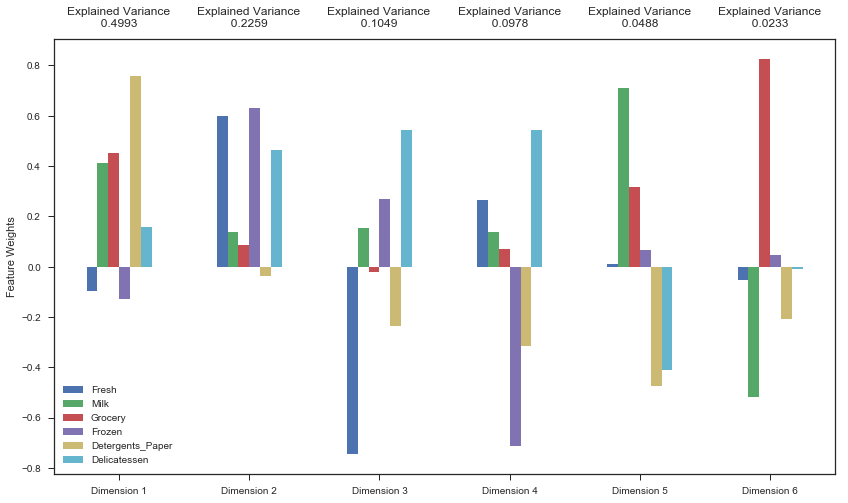

In [231]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

variance_first_1 = np.sum(pca.explained_variance_ratio_[:1])*100
variance_first_2 = np.sum(pca.explained_variance_ratio_[:2])*100
variance_first_3 = np.sum(pca.explained_variance_ratio_[:3])*100
variance_first_4 = np.sum(pca.explained_variance_ratio_[:4])*100
print "Variance explained by the first principal component is: {0} %".format(variance_first_1)
print "Variance explained by first two principal components is: {0} %".format(variance_first_2)
print "Variance explained by first three principal components is: {0} %".format(variance_first_3)
print "Variance explained by first four principal components is: {0} %".format(variance_first_4)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- The total variance explained by the first and second principal component is **72.52%**.
- The tota variance explained by the first four principal component is **92.8%**.
- Each graph for a particular dimension shows the amount of variance contributed by each feature in the eigen vectors, bases on the projections made. The weights assigned to each feature to each dimension shows the the amount or the number of people spending money on those particular features.I will be giving my inferences based on that.

    - For the first dimension formed after PCA analysis, accounts for **49.93%** or approximately **50%** of the total variance in the data. The graph above for this dimension also shows that **Detergent_Papers**, **Milk** and **Grocery** are the features, who account for the most variance in this dimension, this inference is based on the weights given to these features. Then if you consider the problem statement then this means that most of the people spend their money buying stuff from these 3 features mostly in the first dimension.
    
    - The second dimension or the second eigen vector after PCA analysis, accounts for **22.6%** of the total variance, cumulative variance explained by this dimension is: **72.52%** of the total variance. The features that satisfy most of the variance in this dimension are, **Fresh**, **Frozen** and **Delicatessen**. If consider the context of the problem statement and apply this to the second dimension, I come to the conclusion, that people are spending most of the money on the buying stuff from **Fresh**, **Frozen** and **Delicatessen** features.
    
    - Then comes the third dimension, which accounts for **10.5%** of the total variance in the PCA analysis, the cumulative variance explained by this dimension is, **83.01%** of the total variance, when we see the graph for this dimension we see that, **Delicatessen**, **Frozen** and **Milk** are the features who amount to max amount of money spent by customers.
    
    - The fourth dimension formed after analysis, accounts for **9.8%** of the total variance explained by the six dimensions, the cumulative variance satisfied by this dimension is, **92.8%**, in the dimension what we see from the visualization above, is that in context of the problem statement customers prefer buying products in the category of **Delicatessen**, as compared to other categories like, **Fresh** and **Milk**.
    

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [232]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.2636,-6.4880,-0.6672,-2.3417,2.6832,-0.5247
1,1.5782,0.5540,-0.6384,0.6134,-0.4660,0.0292
2,2.9256,-2.3305,-1.2448,-2.7114,1.0078,0.5876


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [233]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [234]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.2636,-6.4880
1,1.5782,0.5540
2,2.9256,-2.3305


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

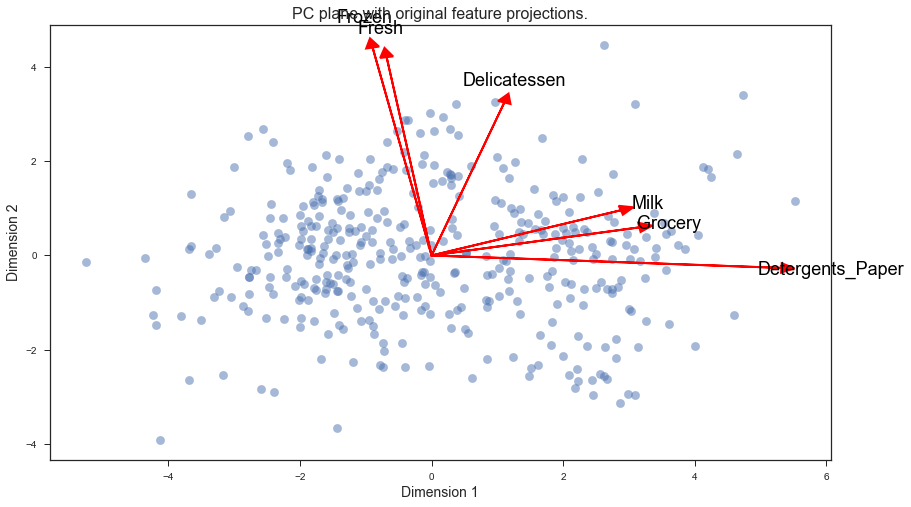

In [235]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

Text(0.5,1,u'Heat map for data with outliers removed.')

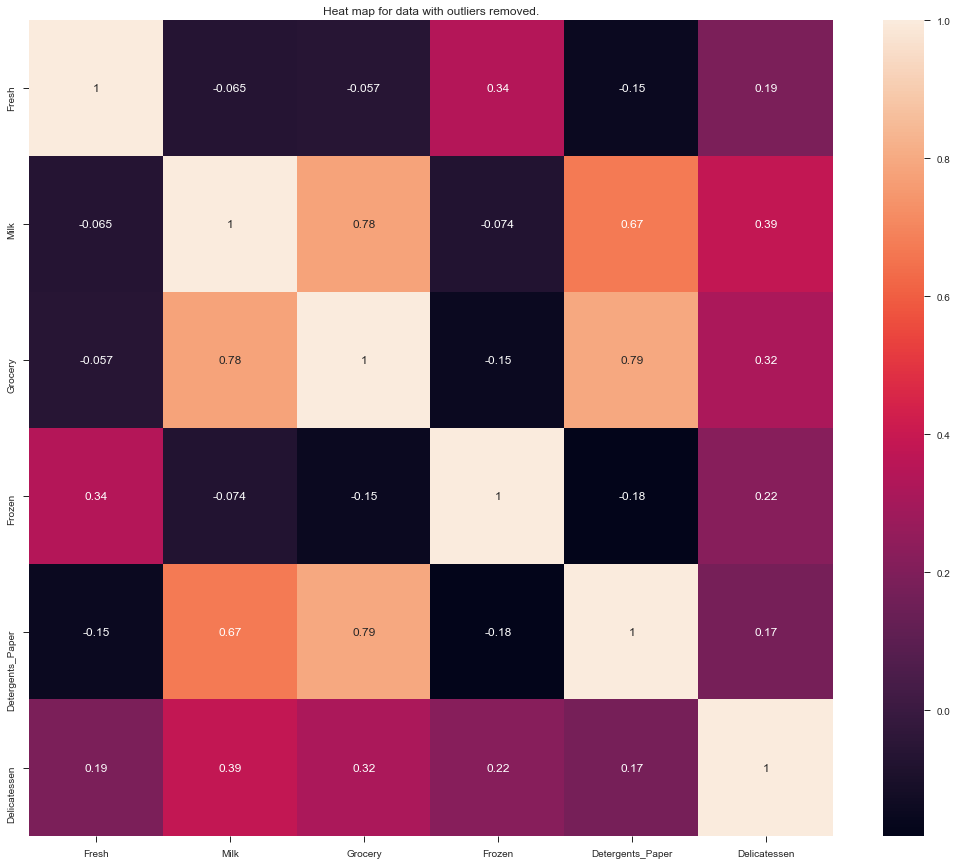

In [236]:
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(good_data.corr(), annot=True, ax=ax)
plt.title("Heat map for data with outliers removed.")

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

- **K-MEANS**
    - K-Means algorithm works on the basis of the euclidean distances between the data points and based on that assigns cluster centres which are then used to cluster the data points. There many advantages for using K-MEANS, the algorithm is fast and we can easily scale the implementation to production system. If we want deterministic clustering of points based on euclidean distance then K-Means is the algorithm to choose. The algorithm is a hard clustering algorithm, which means that the points assigned to cluster centres are assigned with no probabilistic approach either a data point is part of a cluster or it is not.
    - K-Means algorithm always converges to a particular configuration.
    - There are many disadvantages for using K-Means, before clustering we need to perform feature scaling in case of large number of features also in case where the range of features are not comparable.
    - If we do not carry out feature scaling we can get anomaloues results one feature might overcome other features, while computing clusters.
    - Also K-Means, needs a hit and trial methodoligy for finding the right amount of cluster centres to choose.
    
    
- **Gaussian Mixture Model** 
    - Gaussian Mixture Model, represents each data point as a linear combination of various Gaussian Distributions, which thus gives the name of Soft Clustering algorithm. 
    - Unlike K-Means, which uses euclidean distance to assign cluster centres, Gaussian Mixture Model uses **Estimation Maximization Algorithm** to fit the required Gaussian Distributions to data points.
    - The points are clustered in to separate Guassian Distributions, based on the probability distribution of the Gaussians.
    - Gaussian Mixture Models, allow fuzzy clustering which makes, data points to be clustered in elongated shapes, which is not possible in K-MEANS, in other term Gaussian Mixture Models are flexible. 
    

- When we look at the above data set, using the visualization above intutively, it makes sense to use a Gaussian Mixture Model to perform clustering to out data set, because, first there is no clear boundary between the data points by which we can deterministically assign data points to one cluster only. Also here we can easily assume there are some latent variables in the data set, the visualization also makes it very much evident to use Gaussian Mixture Model for clustering, we do not know on what combination of features are the points need to be clustered, therefore using Gaussian Mixture Model, is appropriate.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

The silhouette_score for GMM with clusters: 2 is: 0.446753526945


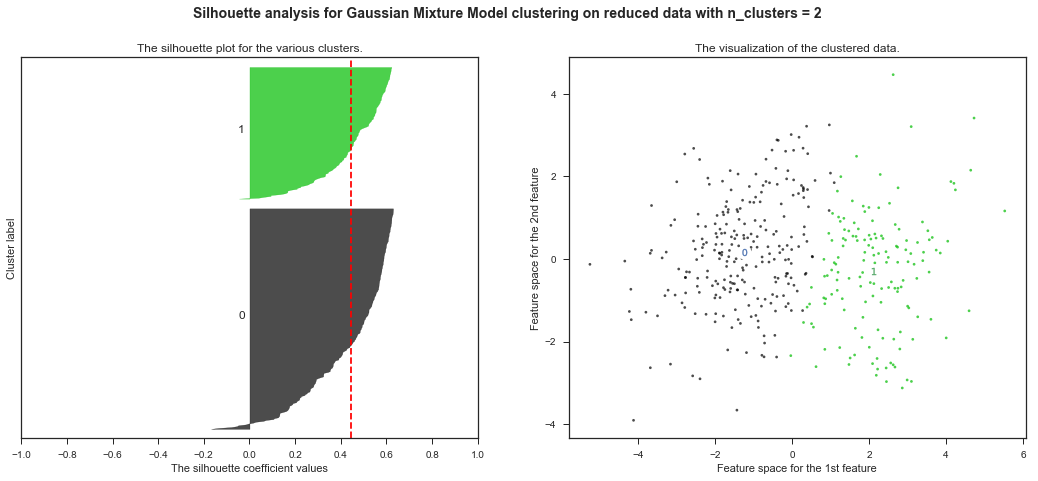

The silhouette_score for GMM with clusters: 3 is: 0.361193625039


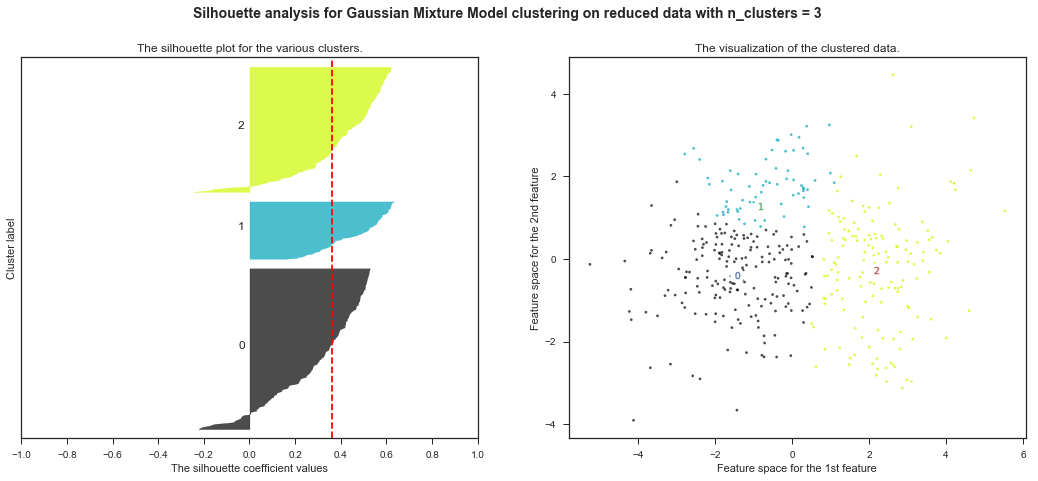

The silhouette_score for GMM with clusters: 4 is: 0.303510689374


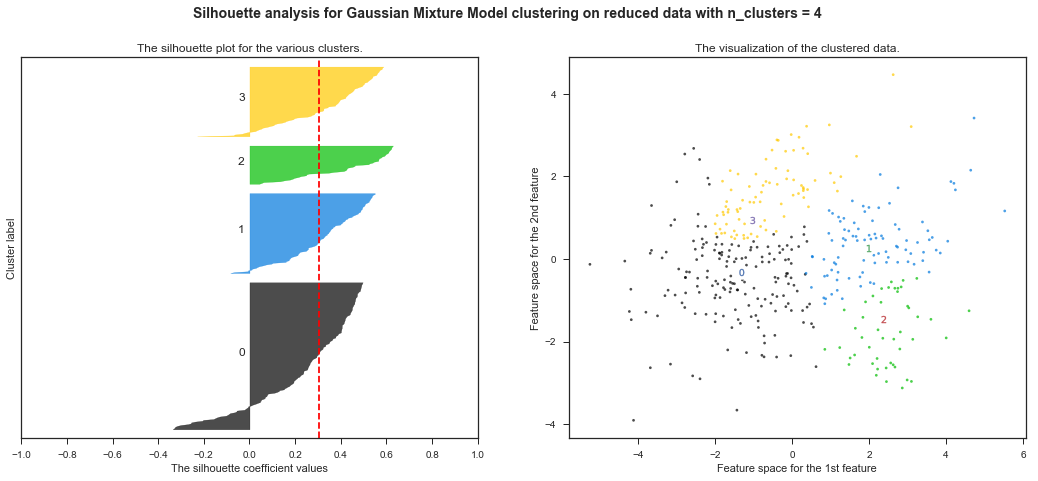

The silhouette_score for GMM with clusters: 5 is: 0.272643029111


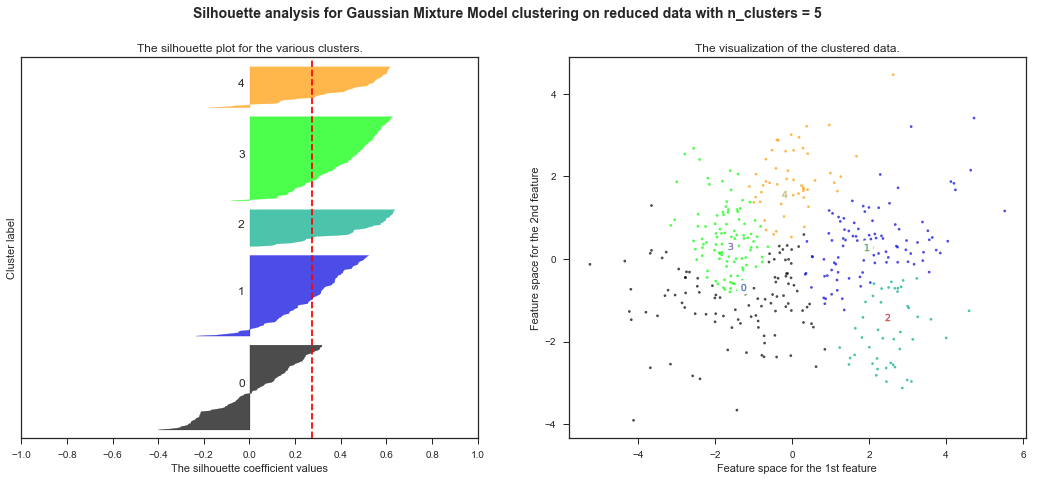

The silhouette_score for GMM with clusters: 6 is: 0.340603716382


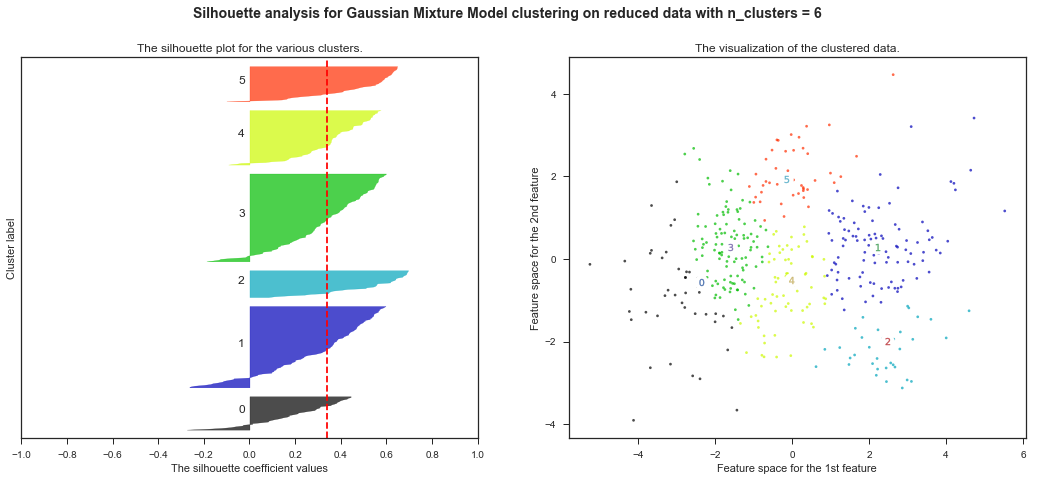

In [237]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = range(2, 7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 clumns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1.0, 1.0])
    
    # The (n_cluster+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim(0, len(reduced_data) + (n_clusters+1)*10)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=8)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    # centers = clusterer.cluster_centers_ - only for KMeans - means_ is the center for GMM.
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "The silhouette_score for GMM with clusters: {0} is: {1}".format(n_clusters, score)
    
    # Compute the silhouette scrores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, preds)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(preds.astype(float) / n_clusters)
    ax2.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Gaussian Mixture Model clustering on reduced data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [259]:
# TODO: Apply your clustering algorithm of choice to the reduced data 

clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print "The mean silhouette coefficient is: {0}".format(score)

The mean silhouette coefficient is: 0.446753526945


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
    
- The silhouette score for various cluster is as follows:
    - **Clusters : Score**
    - 2 : 0.4468
    - 3 : 0.3612
    - 4 : 0.3035
    - 5 : 0.2726
    - 6 : 0.3436
    
- Since we need to find those cluster with silhouette score closer to 1, therefore the number of suitable clusters is **2**, which has the score of **0.4468**.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

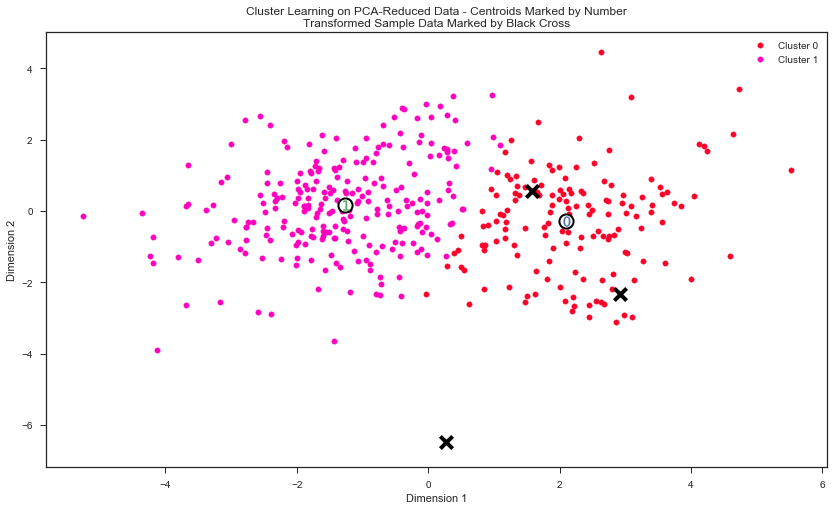

In [239]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [240]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print "Cluster centres: "
display(true_centers)
print "Summation of features for centres: "
display(true_centers.sum(axis=0))
print "Statistics of original data:"
display(np.exp(good_data).describe())
print "Statistics of original data:"
display(samples)

Cluster centres: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0


Summation of features for centres: 


Fresh               14713.0
Milk                 9720.0
Grocery             14001.0
Frozen               3282.0
Detergents_Paper     4750.0
Delicatessen         1895.0
dtype: float64

Statistics of original data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


Statistics of original data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,140,8847,3823,142,1062,3
1,17063,4847,9053,1031,3415,1784
2,1689,6964,26316,1456,15469,37


In [258]:
display(true_centers - np.exp(good_data).mean().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-7212.0,2185.0,3898.0,-1950.0,1688.0,-356.0
Segment 1,-2937.0,-3437.0,-4907.0,-826.0,-2388.0,-659.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
There are very interesting observations that one can make after looking at the clustering visualization, the cluster centres and the 3 samples we chose before.

- One of the samples in the samples we chose before is an outlier and just because it had to be clustered into one of the clusters it is clustered in **Segment 0**.
- Out of the two other remaining samples we can see easily the similarity in feature values between them and the cluster centre.
- Another important observation that can be made by the data shown above is that, in data point belonging to **Segment 0**, only **Milk**, **Grocery** and **Detergents_Papers** lie above the average of the data set, by this we can classify this segment as food stores in urban areas, restaurants, cafes and food wagons.

- Also, one can also see the measure of all features in **Segment 1**, lie below the mean value of the respective feature. Based on this I would say that these type of customers form a segment of farmers or the agriculture sector to be specific.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?

Run the code block below to find which cluster each sample point is predicted to be.

In [244]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
- All of the sample point in the sample data belongs to **Segment 0**.
- Yes, the predictions of all the sample points are consistent.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
We can give an answer for the above question based on the clusterting we have done in the segments **Segment 0** and **Segment 1**.

We know that customers belonging to **Segment 0**, are always in need of some food items belonging to various categories, and the amount spent on the items is more than the average spending, therefore it makes sense to not to apply the change in the delivery service on this Segment.

On the other hand, the spending done by customers in **Segment 1**, is less than the average spending, which means, that those customer are not that much concerned by urgency of goods and therefore we can apply the change of delivery service to this segment of customers.

**Short answer**:
 - No we cannot assume the change will affect all customer equally.
 - We can determine the affect of change based on the clustering we have done.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Now since, we have engineered a **new feature** for the data set, this new feature can now be used to predict future outcomes.

What we can do is, we can train a supervised learning model, on the data set and keeping the newly engineered feature as **`Y`** and data set as **`X`**, we now train a model on **`X`** to predict **`Y`**, which learns from the data set to predict future outcomes( label for the customer ).

Therefore when a new customer comes, the shopkeeper can get predictions from that supervised learning model, based on the features he recieves.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

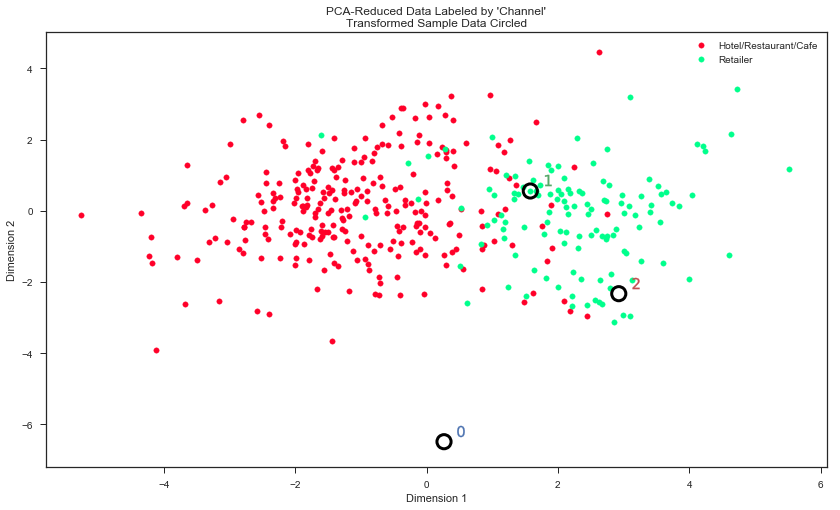

In [260]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

**Answer:**
From the visualization above, we can see that our prediction for the segments for points 0,1 and 2 is in sync with the clustering done after adding two new features. Though we can see that the data set is now mixed a bit more as compared the clustering diagram without adding '`Channel`' and '`Region`' to our data set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.